# Machine Learning - Mini Project 1
## Richard Campo

In [53]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Part 3: Preparing the Data

In [54]:
PATH = r"C:\Users\RichardCampo\Documents\GitHub\Machine-Learning\Mini Project 1"
df_acs = pd.read_csv(os.path.join(PATH, "usa_00001.csv"))

In [55]:
df_acs.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,RACED,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD
0,2022,202201,1295,2022010074840,10800.4,2022000012951,80001,4,1,10800.4,...,200,0,0,8,81,1,10,4000,1,11
1,2022,202201,4519,2022000095945,32078.8,2022000045191,70001,1,2,39655.2,...,100,0,0,6,63,1,10,30000,1,11
2,2022,202201,4519,2022000095945,32078.8,2022000045191,70001,1,3,37559.6,...,100,0,0,6,63,1,10,30000,1,11
3,2022,202201,4841,2022000116058,9672.0,2022000048411,60001,1,1,9833.2,...,100,0,0,6,65,1,10,45300,1,11
4,2022,202201,5002,2022000126199,94946.8,2022000050021,260001,1,1,94946.8,...,200,0,0,7,71,1,10,20000,1,11


In [56]:
crosswalk = pd.read_csv('Education-Crosswalk.csv')

In [57]:
crosswalk = crosswalk.rename(columns={'educd': 'EDUCD', 'educdc': 'EDUCDC'})
df_acs = df_acs.merge(crosswalk, on='EDUCD')
df_acs.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,...,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD,EDUCDC
0,2022,202201,1295,2022010074840,10800.4,2022000012951,80001,4,1,10800.4,...,0,0,8,81,1,10,4000,1,11,14.0
1,2022,202201,6453,2022000222947,13218.4,2022000064531,180101,1,2,20311.2,...,0,0,8,81,1,10,20000,1,11,14.0
2,2022,202201,6937,2022000255097,10639.2,2022000069371,10001,1,1,10478.0,...,0,0,8,81,1,10,0,1,11,14.0
3,2022,202201,11773,2022000589219,5642.0,2022000117731,250001,1,3,7254.0,...,0,0,8,81,1,10,0,1,11,14.0
4,2022,202201,14513,2022000775583,15152.8,2022000145131,120101,1,1,15152.8,...,0,0,8,81,1,10,60000,1,11,14.0


In [58]:
# codes 62 - 100 include people with a HS degree but no BA
df_acs["HSDIP"] = np.where(
    (62 <= df_acs["EDUCD"]) & (df_acs["EDUCD"] <= 100), 
    1, 
    0
)

# codes 101 - 116 are college grads and higher, excluding 999 NAs
df_acs["COLDIP"] = np.where(
    (101 <= df_acs["EDUCD"]) & (df_acs["EDUCD"] <= 116),
    1,
    0
)

In [59]:
df_acs["WHITE"] = np.where(df_acs["RACE"] == 1, 1, 0)
df_acs["BLACK"] = np.where(df_acs["RACE"] == 2, 1, 0)
df_acs["HISPANIC"] = np.where(df_acs["HISPAN"].isin([1, 2, 3, 4]), 1, 0)

df_acs["MARRIED"] = np.where(df_acs["MARST"].isin([1, 2]), 1, 0)
df_acs["FEMALE"] = np.where(df_acs["SEX"] == 2, 1, 0)
df_acs["VET"] = np.where(df_acs["VETSTAT"] == 2, 1, 0)

In [60]:
df_acs["HSDIP-EDUCDC"] = np.multiply(df_acs["HSDIP"], df_acs["EDUCDC"])
df_acs["COLDIP-EDUCDC"] = np.multiply(df_acs["COLDIP"], df_acs["EDUCDC"])

In [66]:
df_acs["AGESQ"] = np.power(df_acs["AGE"], 2)

# drop values where INCWAGE is 0 because ln(0) is undefined
df_acs = df_acs[df_acs["INCWAGE"] != 0]
df_acs["INCWAGE_LOG"] = np.log(df_acs["INCWAGE"])

### Part 4: Data Analysis

#### Q1

In [71]:
columns = ["YEAR", "INCWAGE", "INCWAGE_LOG", "EDUCDC", "FEMALE", "AGE", 
"AGESQ", "WHITE", "BLACK", "HISPANIC", "MARRIED", "NCHILD", "VET", "HSDIP", 
"COLDIP", "HSDIP-EDUCDC", "COLDIP-EDUCDC"]

df_acs[columns].describe()

,YEAR,INCWAGE,INCWAGE_LOG,EDUCDC,FEMALE,AGE,AGESQ,WHITE,BLACK,HISPANIC,MARRIED,NCHILD,VET,HSDIP,COLDIP,HSDIP-EDUCDC,COLDIP-EDUCDC
count,8376.0,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000,8376.000000
mean,2022.0,66839.484241,10.611709,14.276982,0.484002,41.548352,1899.201648,0.663324,0.077603,0.161175,0.556113,0.808739,0.040592,0.526146,0.411175,6.837631,6.971585
std,0.0,80757.732310,1.133255,3.052954,0.499774,13.151301,1100.726437,0.472601,0.267561,0.367714,0.496871,1.107780,0.197355,0.499346,0.492076,6.524545,8.394349
min,2022.0,20.000000,2.995732,0.000000,0.000000,18.000000,324.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.0,25000.000000,10.126631,12.000000,0.000000,31.000000,961.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2022.0,47000.000000,10.757903,14.000000,0.000000,41.000000,1681.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000
75%,2022.0,80000.000000,11.289782,16.000000,1.000000,53.000000,2809.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,13.000000,16.000000
max,2022.0,761000.000000,13.542389,22.000000,1.000000,65.000000,4225.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,14.000000,22.000000


#### Q2

<Axes: xlabel='EDUCDC', ylabel='INCWAGE_LOG'>

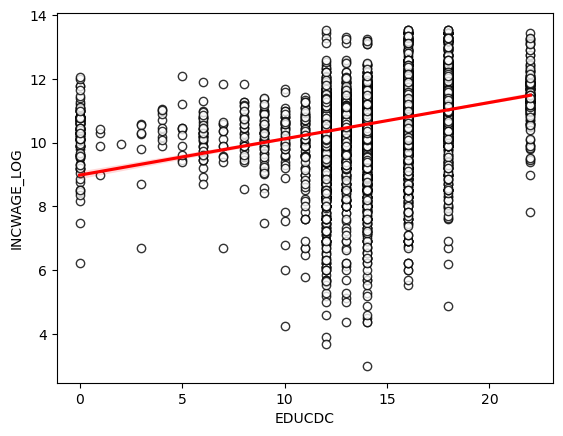

In [76]:
sns.regplot(
    df_acs, 
    x = "EDUCDC", 
    y = "INCWAGE_LOG", 
    scatter_kws={'color': 'white', 'edgecolors': 'black'},
    line_kws={'color': 'red'}
    )